# Introduction

This project focuses on analyzing data from the National Park Service, specifically related to various species across different park locations and their conservation status. The key sections of this project include defining objectives, data preparation, analysis, data visualization, and drawing conclusions from the findings.

The project seeks to answer the following questions:
- What is the distribution of conservation status among species?
- Are certain species types more prone to endangerment?
- Are the differences between species and their conservation status statistically significant?
- Which animal is most common, and how are they distributed across parks?

**Data sources:**

The datasets `Observations.csv` and `Species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com).

Note: The data used in this project is inspired by real-world data but is primarily fictional.

# Project objective
## Project goal
In this project, the analysis will be conducted from the viewpoint of a biodiversity analyst for the National Park Service. The primary goal of the National Park Service is to protect at-risk species and sustain biodiversity within their parks. As an analyst, the main focus will be to understand the characteristics of the species, their conservation status, and how they relate to the national parks. Key questions include:

- What is the distribution of conservation status among species?
- Are certain types of species more prone to being endangered?
- Are there significant differences between species and their conservation status?
- Which animals are most common, and how are they distributed across the parks?
## Data
This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

# Data preparation
First, import the library that will use to analyze in this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display #This is for displaying tables with better readability

To examine the conservation status of species and their observations in national parks, the datasets are first loaded into DataFrames. Once in DataFrame format, the data can be explored and visualized using Python.

In the following steps, `Observations.csv` and `Species_info.csv` are read into DataFrames named `observations` and `species`, respectively. The contents of these DataFrames are then previewed with `.head()` to get an initial look at the data.

The `species_info.csv` file provides details about various species found in the National Parks. The dataset includes the following columns:

- category: The taxonomic category for each species
- scientific_name: The scientific name of each species
- common_names: The common names for each species
- conservation_status: The conservation status of each species

In [2]:
species = pd.read_csv('species_info.csv')
display(species.head(5))

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The Observations.csv file provides data on species sightings recorded in various national parks over the past week. The columns in this dataset are:

- scientific_name: The scientific name of each species
- park_name: The name of the national park where the sightings occurred
- observations: The count of observations made in the past 7 days

In [3]:
observations = pd.read_csv('observations.csv')
display(observations.head(5))

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Analytics
This section will delve deeply into the data and use the insights gained to perform further analysis.

## Data Exploration

To begin with, we'll examine the characteristics of the data by checking the dimensions and data types of the variables in both datasets using the `describe` method. park.

For the `species` dataset:
- It has 5,824 rows, each with a unique category and scientific name.
- There are 4 distinct conservation status types.
- Out of the rows, 191 have data for the conservation status, while the rest are missing values.

In [4]:
display(species.describe(include='all'))

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


For the `observations` dataset:
- It contains a total of 23,296 rows.
- There are 5,541 unique scientific names.
- It includes data from only 4 parks, with "Myotis lucifugus" being the most common scientific name and "Mountains National Park" being the most frequently reported park.


In [5]:
display(observations.describe(include='all'))

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


We will further explore each column in detail. The `category` column consists of 7 categories, including plants and animals. `Reptiles` make up the smallest portion with 79 species, while `birds` represent the largest group with 521 species.

In [6]:
display(species.groupby('category').size().reset_index())

,category,0
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


Next, we will examine the conservation status variable in more detail. The missing values mentioned earlier are due to species that do not require any concern, so I will replace the `NaN` values with `No Intervention`. The total counts for each conservation status are as follows: 16 species are classified as Endangered, 4 species as In Recovery, 161 species as Species of Concern, 10 species as Threatened, and 5633 species as No Intervention.
- `Species of Concern`: declining or appear to be in need of conservation.
- `Threatened`: vulnerable to endangerment in the near future.
- `Endangered`: seriously at risk of extinction.
- `In Recovery`: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range.

Based on the stacked bar chart below, we can observe that many endangered species, such as birds and mammals, are currently in recovery. However, birds outnumber mammals on the recovery list.




,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


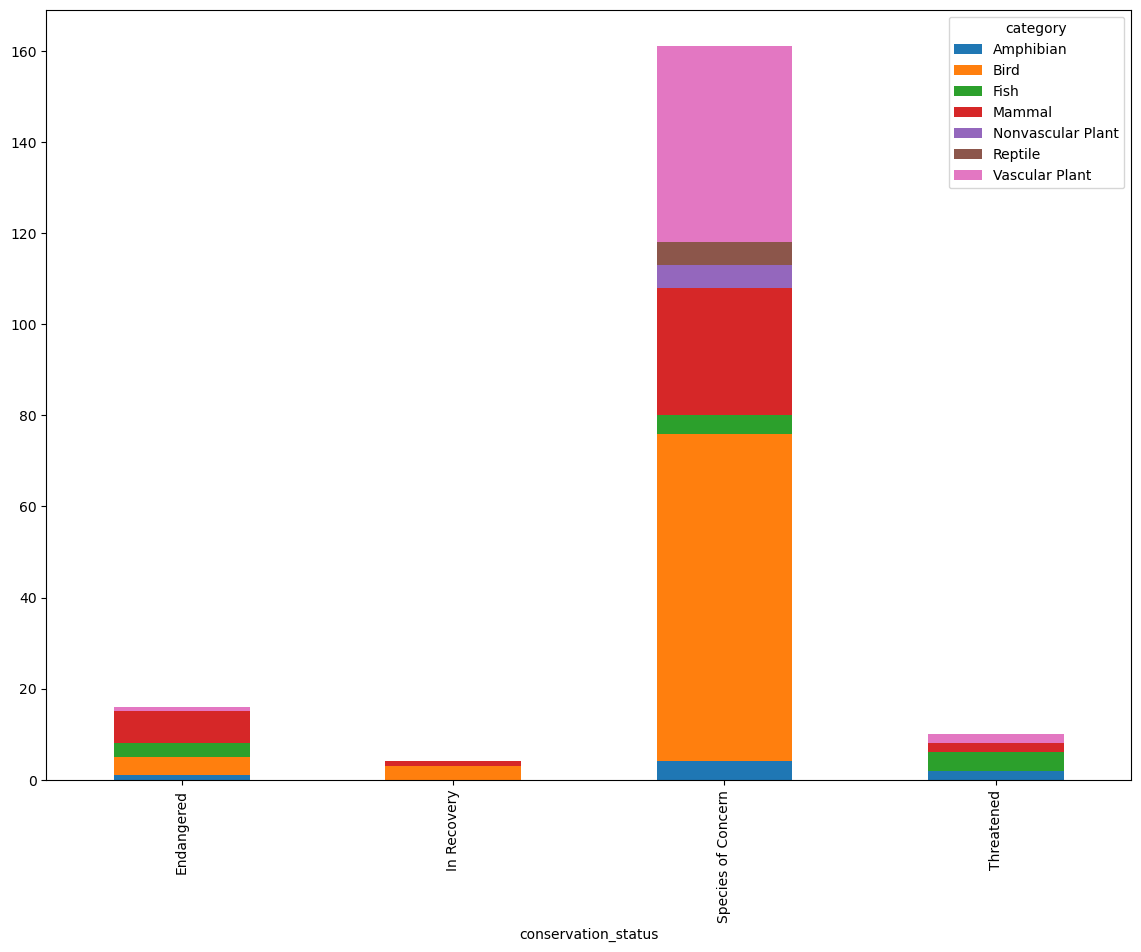

<Figure size 640x480 with 0 Axes>

In [29]:
species.fillna('No Intervention', inplace=True)
display(species.groupby('conservation_status').size().reset_index())
category = pd.pivot_table(species[species['conservation_status'] != 'No Intervention'],
                          index='conservation_status',
                          values='scientific_name',
                          aggfunc='count',
                          columns='category')
display(category)
category.plot(kind='bar',stacked=True,figsize=(14,10))
plt.savefig('graph-1.png')
plt.show()
plt.clf()

## Data Analytics
### In Conservation

In the previous section, we examined the distribution of different animal types and their conservation statuses. Now, we want to explore the question: Are certain species more susceptible to becoming endangered? To analyze which animal types are more likely to face endangerment, I will create a new column called `conservation`, which will include any species with data other than `No Intervention`n.'

In [8]:
species['conservation'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'conservation'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='conservation',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

display(category_counts)

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Next, I will add a new column called `protected_percentage`, which will represent the proportion of protected species within each type of species.

In [9]:
category_counts['protected_proportion'] = round(category_counts['protected']/category_counts['not_protected'] * 100,1)
display(category_counts)

,category,not_protected,protected,protected_proportion
0,Amphibian,72,7,9.7
1,Bird,413,75,18.2
2,Fish,115,11,9.6
3,Mammal,146,30,20.5
4,Nonvascular Plant,328,5,1.5
5,Reptile,73,5,6.8
6,Vascular Plant,4216,46,1.1


In this section, we will conduct chi-squared tests to determine if there are statistically significant differences in conservation status rates across different species. To perform the chi-squared test, a contingency table will be created, which should look like this:

|             | Protected | Not Protected |
| ----------- | ---------- | -------------- |
| Mammal      | ?          | ?              |
| Bird        | ?          | ?              |

The first test, named `contingency1`, will be populated with the correct values for mammals and birds.

The chi-squared test results provide several values, including the p-value, which in this case is 0.69. The standard threshold for statistical significance is a p-value of 0.05. Since 0.69 is much larger than 0.05, this indicates that there is no significant relationship between the conservation statuses of mammals and birds, meaning these variables are independent of each other.

In [10]:
from scipy.stats import chi2_contingency
contingency1 = [[30, 146],
              [75, 413]]
chi2, pval, dof, expected = chi2_contingency(contingency1)
display('P value: ' + str(pval))

'P value: 0.6875948096661336'

The next comparison will test the difference between `Reptile` and `Mammal`.

The contingency table format will be as follows:

||Protected|Not Protected|
|---|---|---|
|Mammal|?|?|
|Reptile|?|?|

In this case, the p-value is 0.039, which is below the standard threshold of 0.05. This indicates that the difference between reptiles and mammals is statistically significant. The results suggest that mammals have a significantly higher rate of needing protection compared to reptiles.

In [11]:
from scipy.stats import chi2_contingency
contingency2 = [[30, 146],
               [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
display('P value: ' + str(pval))

'P value: 0.03835559022969898'

### Species in each parks
The following analysis will focus on data collected by conservationists, who have recorded sightings of various species across multiple national parks over the last 7 days.

To answer the question of which animal is most prevalent and how they are distributed among the parks, the first step is to examine the common names of species in the dataset. The data will need to be broken down into individual species names for further analysis.

In [12]:
from itertools import chain
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category.isin(["Mammal"])]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should no be counted more than once per species. And collapse to one list for easier to use

In [13]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item)) # this line conver list to a dict in dict each key must be unique so it remove duplicate
    cleanRows.append(item)
    
cleanRows[:6]
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
#from_iterable  It iterates over each sublist and chains the elements together into a single list.
# this lambda isinstance(i, list) check i is a list or not, if not transfer to a list
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']


The data is now prepared for counting the occurrences of each word. From this analysis, it appears that "Bat" occurred 23 times, while "Shrew" appeared 18 times.

In [14]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
65,Bat,23
136,Shrew,18
21,Myotis,17
163,Mouse,16
107,Chipmunk,13
131,Squirrel,12
86,American,12
186,Eastern,11
16,Vole,11
73,Mountain,10



In the dataset, multiple scientific names correspond to different bat species. The next step is to identify the rows that reference bats. A new column will be added with boolean values to indicate whether each row represents a bat species (is_bat set to True). There seems to be a lot of species of bats and a mix of protected vs. non-protected species.

In [15]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,conservation,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


The next step involves combining the bat species data with the observations to generate a DataFrame that captures bat sightings across the four national parks.

In [16]:
bat_observations = pd.merge(species[species.is_bat],observations, how='inner')
bat_observations

,category,scientific_name,common_names,conservation_status,conservation,is_bat,park_name,observations
0,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Yosemite National Park,188
1,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Great Smoky Mountains National Park,80
2,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Bryce National Park,57
3,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Yellowstone National Park,259
4,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Yellowstone National Park,227
...,...,...,...,...,...,...,...,...
139,Mammal,Lasiurus blossevillii,Western Red Bat,Species of Concern,True,True,Yellowstone National Park,221
140,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,False,True,Great Smoky Mountains National Park,81
141,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,False,True,Bryce National Park,93
142,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,False,True,Yosemite National Park,149


Let's examine the total number of bat observations, aggregated across all species, for each national park.

The table below shows the number of bat observations made in each park over the past week. Yellowstone National Park has the highest count with 8,362 observations, while the Great Smoky Mountains National Park has the lowest with 2,411.

In [17]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now, let's break down the bat observations at each park into protected versus non-protected bat sightings. It appears that, with the exception of the Great Smoky Mountains National Park, each park has more sightings of protected bats compared to non-protected ones. This could be seen as a positive indicator for bat populations.

The plot below shows the results of the recent data manipulation. It indicates that Yellowstone and Bryce National Parks are performing well in terms of bat conservation, as evidenced by a higher number of protected bat sightings compared to non-protected species. In contrast, the Great Smoky Mountains National Park may need to enhance its conservation efforts, as it has reported more sightings of non-protected bat species.

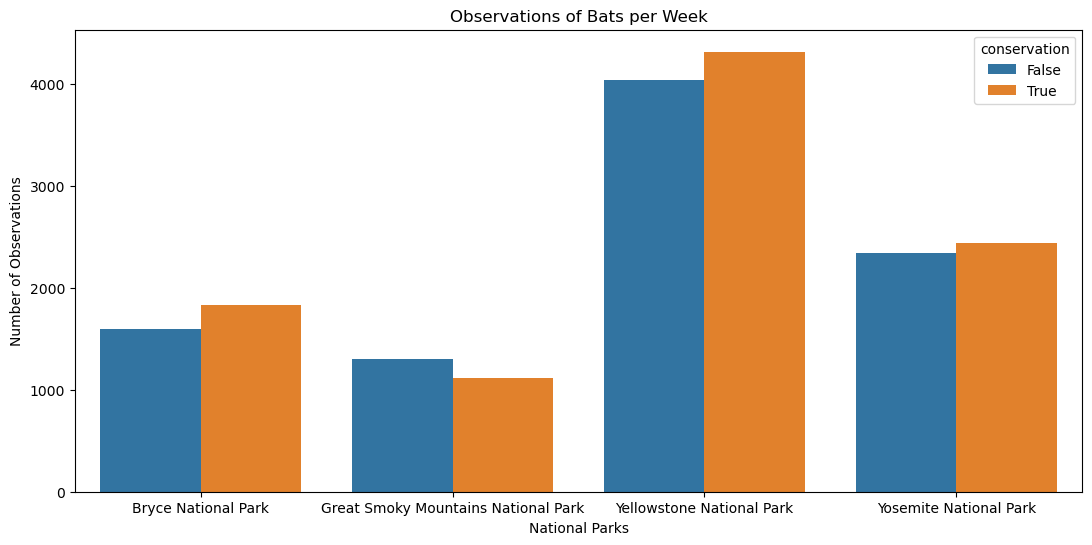

<Figure size 640x480 with 0 Axes>

In [27]:
obs_by_park = bat_observations.groupby(['park_name', 'conservation']).observations.sum().reset_index()
obs_by_park
plt.figure(figsize=(13, 6))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.conservation)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.savefig('graph-2.png')
plt.show()
plt.clf()

# Conclusions

The project successfully produced several data visualizations and insights about species across four National Parks in the dataset. It also addressed the initial questions:

- **What is the distribution of conservation status for species?**
  - The majority of species were not under conservation, with 5,633 species not protected compared to 191 that were.

- **Are certain types of species more likely to be endangered?**
  - Mammals and birds had the highest percentage of species under endangered.

- **Are the differences between species and their conservation status significant?**
  - Although there was no significant difference in conservation percentages between mammals and birds, a statistically significant difference was observed between mammals and reptiles.

- **Which animal is most prevalent and what is their distribution amongst parks?**
  - Bats were the most frequently observed species, with the highest occurrence in Yellowstone National Park.

# Further Research

The dataset analyzed covered only the past 7 days, limiting the ability to study changes over time. It would be valuable to examine how the conservation status of various species evolves over longer periods. Additionally, the dataset lacks information on the area of each park. Considering that Yellowstone National Park is likely much larger than the other parks, this size difference could account for more observations and greater biodiversity. Finally, if precise location data were available, it would be possible to analyze the spatial distribution of species and investigate whether these observations are spatially clustered.